In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

Define number of particles and get random positions (between 0 and 1) for each particle

In [2]:
n_particles = 16
r = np.random.random((2,n_particles))
# Color particles the start on either side
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

Give IDs to each particle (this will come in handy later)

In [3]:
ids = np.arange(n_particles)

In [4]:
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Plot initial configuration of particles

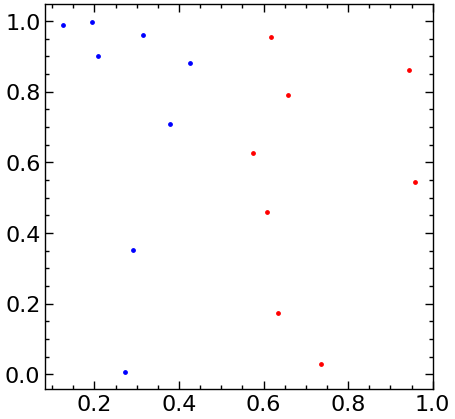

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6)

Obtain the initial velocities in the gas. We'll make the particles starting on the RHS move to the left at 500m/s and on the vice versa.

* **Note**: We're using the assumption that particles in a gas move at approximately 500m/s, thanks google.

In [6]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

To run this simulation, we need to determine when two particles collide, and what the resulting final velocities will be.

# Part 1: Distance Between all Pairs

* To determine if two particles collide, we need to find the distance between **all pairs** of particles. If the distance is less than 2 times the radius of each particle, they collide. If there are $n$ particles, there are $n(n-1)/2$ pairs (combinatorics). To make this easier, we'll get pairs of particle IDs.

In [7]:
ids_pairs = np.asarray(list(combinations(ids,2)))
#ids_pairs

In [8]:
ids_pairs[:,0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13,
       14])

We can obtain distances between particles in a similar fashion

* First get the pairs of x-positions of all particles (**NOTE: THIS HAS BEEN UPDATED SINCE THE YOUTUBE VIDEO AND IS MUCH MORE EFFICIENT. THANK YOU TO @swni ON REDDIT FOR THE SUGGESTION**)

In [9]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
x_pairs

array([[0.29076664, 0.20878243],
       [0.29076664, 0.60700343],
       [0.29076664, 0.37796709],
       [0.29076664, 0.31448031],
       [0.29076664, 0.19485887],
       [0.29076664, 0.73616031],
       [0.29076664, 0.65827589],
       [0.29076664, 0.12562909],
       [0.29076664, 0.94418557],
       [0.29076664, 0.27175823],
       [0.29076664, 0.958812  ],
       [0.29076664, 0.61704431],
       [0.29076664, 0.63367342],
       [0.29076664, 0.42583373],
       [0.29076664, 0.57457249],
       [0.20878243, 0.60700343],
       [0.20878243, 0.37796709],
       [0.20878243, 0.31448031],
       [0.20878243, 0.19485887],
       [0.20878243, 0.73616031],
       [0.20878243, 0.65827589],
       [0.20878243, 0.12562909],
       [0.20878243, 0.94418557],
       [0.20878243, 0.27175823],
       [0.20878243, 0.958812  ],
       [0.20878243, 0.61704431],
       [0.20878243, 0.63367342],
       [0.20878243, 0.42583373],
       [0.20878243, 0.57457249],
       [0.60700343, 0.37796709],
       [0.

* Then take the difference to get $\Delta x_{ij}$ of all pairs

In [10]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([-0.08198421,  0.3162368 ,  0.08720046,  0.02371367, -0.09590776,
        0.44539368,  0.36750925, -0.16513755,  0.65341893, -0.01900841,
        0.66804537,  0.32627767,  0.34290679,  0.13506709,  0.28380585,
        0.39822101,  0.16918467,  0.10569788, -0.01392355,  0.52737789,
        0.44949346, -0.08315334,  0.73540314,  0.0629758 ,  0.75002958,
        0.40826188,  0.424891  ,  0.21705131,  0.36579007, -0.22903634,
       -0.29252313, -0.41214456,  0.12915688,  0.05127245, -0.48137435,
        0.33718214, -0.33524521,  0.35180857,  0.01004088,  0.02666999,
       -0.1811697 , -0.03243094, -0.06348679, -0.18310822,  0.35819322,
        0.28030879, -0.25233801,  0.56621848, -0.10620887,  0.58084491,
        0.23907722,  0.25570633,  0.04786664,  0.1966054 , -0.11962143,
        0.42168001,  0.34379558, -0.18885122,  0.62970526, -0.04272208,
        0.6443317 ,  0.302564  ,  0.31919312,  0.11135342,  0.26009218,
        0.54130144,  0.46341701, -0.06922979,  0.7493267 ,  0.07

The total distance is just $d_{ij}= \sqrt{\Delta x_{ij}^2 + \Delta y_{ij}^2}$. Since there are $n(n-1)/2$ pairs, there will be $n(n-1)/2$ different values of $d_{ij}$.

In [11]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = np.array([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.55494127, 0.33408674, 0.36689118, 0.60846294, 0.65256444,
       0.55069714, 0.57143297, 0.65802889, 0.82866633, 0.34558552,
       0.69535787, 0.68477567, 0.38744794, 0.54546033, 0.39384841,
       0.59427124, 0.25626097, 0.12112234, 0.09762428, 1.01969164,
       0.46306235, 0.12115855, 0.73644787, 0.89612981, 0.83017788,
       0.41171287, 0.84397087, 0.21800588, 0.45809869, 0.33804983,
       0.57950752, 0.67751295, 0.45052201, 0.33379561, 0.71540528,
       0.52460757, 0.56340103, 0.36198535, 0.49440743, 0.28933641,
       0.45808027, 0.16848571, 0.25950835, 0.34220983, 0.76879106,
       0.29183234, 0.37736819, 0.58659375, 0.70943554, 0.6033925 ,
       0.34279909, 0.59453899, 0.17862804, 0.2135247 , 0.12535489,
       1.02283776, 0.38371869, 0.19106031, 0.63734119, 0.95402008,
       0.76642851, 0.30262257, 0.85053021, 0.13683645, 0.42405436,
       1.11024466, 0.50791605, 0.06975056, 0.7615398 , 0.99352102,
       0.88791147, 0.42441349, 0.93518551, 0.25891999, 0.53185

# Part 2: Velocities of a Collision

So at each iteration of the simulation, we will evaluate `d_pairs`, and if any of the distances between particles is less than $2r$, then a collision occurs. What is the final velocity of each of the two spheres? In an elastic collision (conservation of energy + momentum + angular momentum), one can show

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

In [12]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[1, 5],
       [5, 8]])

We will call all the particles in the left column "1" and the right column "2"

In [13]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Then we can compute the new velocity:

In [14]:
v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)

# Part 3: Functions to Run the Simulation

Here we define some functions that will help make running the simulation easier.

In [15]:
def get_delta_pairs(x, ids_pairs):
    return np.diff(np.array([x[ids_pairs[:,0]], x[ids_pairs[:,1]]]).T, axis=1).ravel()

def get_deltad_pairs(r, ids_pairs):
    return np.sqrt(get_delta_pairs(r[0], ids_pairs)**2 + get_delta_pairs(r[1], ids_pairs)**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r, ids_pairs) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Set the radius and find the position of all particles as a function of time (3D array `rs` where each axis is $(t,x,y)$).

In [16]:
radius = 0.03
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Plot red and blue circles, making sure each is the correct size.

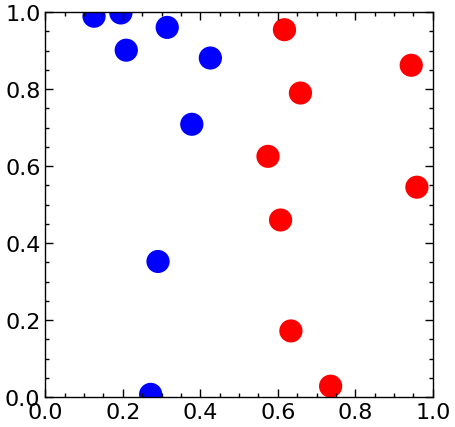

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Make initial animation of the simulation

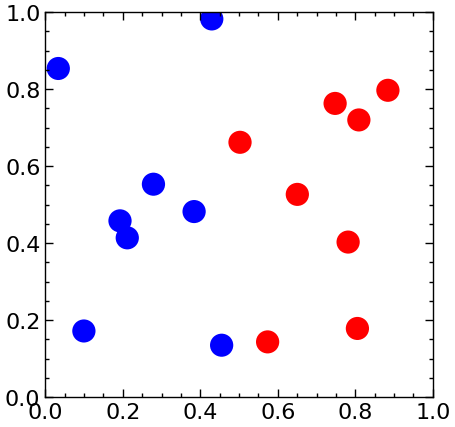

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

Now that we're sure that it works, lets make a simulation containing many more particles

In [18]:
n_particles = 5000
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Let's look at the final velocity distribution of the particles and compare it to Maxwell-Boltzmann in 2 Dimensions:

* $kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

In [19]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Plot the final histogram next to this curve:

Text(0, 0.5, '# Particles')

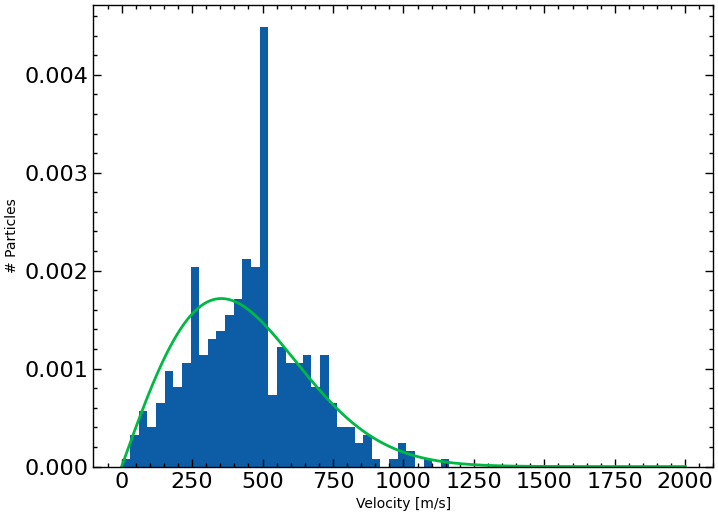

In [21]:
bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

Finally, we can make an animation of the particles moving around and the histogram at the same time

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)